In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
!wget https://static-content.springer.com/esm/art%3A10.1186%2Fs40561-022-00192-z/MediaObjects/40561_2022_192_MOESM1_ESM.xlsx

--2023-06-04 09:55:19--  https://static-content.springer.com/esm/art%3A10.1186%2Fs40561-022-00192-z/MediaObjects/40561_2022_192_MOESM1_ESM.xlsx
Resolving static-content.springer.com (static-content.springer.com)... 151.101.0.95, 151.101.64.95, 151.101.128.95, ...
Connecting to static-content.springer.com (static-content.springer.com)|151.101.0.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68124 (67K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘40561_2022_192_MOESM1_ESM.xlsx.17’

40561_2022_192_MOES 100%[===================>]  66.53K  --.-KB/s    in 0.01s   

2023-06-04 09:55:19 (4.48 MB/s) - ‘40561_2022_192_MOESM1_ESM.xlsx.17’ saved [68124/68124]



In [ ]:
turkish_df = pd.read_excel('40561_2022_192_MOESM1_ESM.xlsx')


print(turkish_df.head())

  stdID  mid-term  final                               faculty  \
0  std1        60     68  İKTİSADİ VE İDARİ BİLİMLER FAKÜLTESİ   
1  std2        34     67     BEDEN EĞİTİMİ VE SPOR YÜKSEKOKULU   
2  std3        25     75                      EĞİTİM FAKÜLTESİ   
3  std4        50     66                      EĞİTİM FAKÜLTESİ   
4  std5        50     66                      EĞİTİM FAKÜLTESİ   

                                         department  
0                   Siyaset Bilimi ve Kamu Yönetimi  
1                               Antrenörlük Eğitimi  
2  Bilgisayar ve Öğretim Teknolojileri Öğretmenliği  
3                      Sosyal Bilgiler Öğretmenliği  
4                          Okul Öncesi Öğretmenliği  


Educational data mining prediction of students' academic performance using machine learning algorithms

| Faculty                               | Number  |
|---------------------------------------------------|------|
| Faculty of Education                              | 404 |
| Faculty of Arts and Sciences                      | 319  |
| Faculty of Health Sciences                        | 296  |
| Faculty of Economics and Administrative Sciences  | 221  |
| School of Physical Education and Sports           | 192  |
| Faculty of Engineering and Architecture           | 116  |
| School of Physical Therapy and Rehabilitation     | 92   |
| Faculty of Islamic Sciences                       | 88   |
| Faculty of Agriculture                            | 68   |
| Faculty of Fine Arts                              | 30   |
| Vocational School of Applied Sciences             | 28   |
| Total Number of Students                          | 1854 |


Turkish Language-I course in the 2019–2020 Fall Semester

Midterm and final exam grades are ranging from 0 to 100. In this system, the end-of-semester achievement grade is calculated by taking 40% of the midterm exam and 60% of the final exam. Students with achievement grade below 60 are unsuccessful and those above 60 are successful. The midterm exam is usually held in the middle of the academic semester and the final exam is held at the end of the semester

In [ ]:
turkish_df

,stdID,mid-term,final,faculty,department
0,std1,60,68,İKTİSADİ VE İDARİ BİLİMLER FAKÜLTESİ,Siyaset Bilimi ve Kamu Yönetimi
1,std2,34,67,BEDEN EĞİTİMİ VE SPOR YÜKSEKOKULU,Antrenörlük Eğitimi
2,std3,25,75,EĞİTİM FAKÜLTESİ,Bilgisayar ve Öğretim Teknolojileri Öğretmenliği
3,std4,50,66,EĞİTİM FAKÜLTESİ,Sosyal Bilgiler Öğretmenliği
4,std5,50,66,EĞİTİM FAKÜLTESİ,Okul Öncesi Öğretmenliği
...,...,...,...,...,...
1849,std1850,70,84,KAMAN UYGULAMALI BİLİMLER YÜKSEKOKULU,Yönetim Bilişim Sistemleri
1850,std1851,60,60,KAMAN UYGULAMALI BİLİMLER YÜKSEKOKULU,Yönetim Bilişim Sistemleri
1851,std1852,56,76,KAMAN UYGULAMALI BİLİMLER YÜKSEKOKULU,Yönetim Bilişim Sistemleri
1852,std1853,56,62,KAMAN UYGULAMALI BİLİMLER YÜKSEKOKULU,Yönetim Bilişim Sistemleri


In [ ]:
print(turkish_df['faculty'].unique())

['İKTİSADİ VE İDARİ BİLİMLER FAKÜLTESİ'
 'BEDEN EĞİTİMİ VE SPOR YÜKSEKOKULU' 'EĞİTİM FAKÜLTESİ' 'ZİRAAT FAKÜLTESİ'
 'FEN EDEBİYAT FAKÜLTESİ' 'NEŞET ERTAŞ GÜZEL SANATLAR FAKÜLTESİ'
 'MÜHENDİSLİK-MİMARLIK FAKÜLTESİ' 'İSLAMİ İLİMLER FAKÜLTESİ'
 'FİZİK TEDAVİ VE REHABİLİTASYON YÜKSEKOKULU' 'SAĞLIK BİLİMLERİ FAKÜLTESİ'
 'KAMAN UYGULAMALI BİLİMLER YÜKSEKOKULU']


In [ ]:
encoder = LabelEncoder()
turkish_df['faculty'] = encoder.fit_transform(turkish_df['faculty'])
turkish_df['department'] = encoder.fit_transform(turkish_df['department'])

In [ ]:
turkish_df['achievement_grade'] = 0.4 * turkish_df['mid-term'] + 0.6 * turkish_df['final']

In [ ]:
#Grade Difference: Calculate the absolute difference between the 'mid-term' and 'final' grades. This feature can capture how much a student's performance improved or declined from the mid-term to the final exam.
turkish_df['grade_diff'] = abs(turkish_df['mid-term'] - turkish_df['final'])

#Grade Ratio: Calculate the ratio of the 'mid-term' grade to the 'final' grade. This feature can capture the proportion of a student's performance in the mid-term exam compared to the final exam.
turkish_df['grade_ratio'] = turkish_df['mid-term'] / turkish_df['final']

#Grade Change: Calculate the difference between the 'mid-term' and 'final' grades and encode it as a binary feature indicating whether the grade increased or decreased. This can capture the direction of change in performance.
turkish_df['grade_change'] = np.where(turkish_df['final'] > turkish_df['mid-term'], 1, 0)

faculty_avg_grade = turkish_df.groupby('faculty')['final'].mean().reset_index()
turkish_df = pd.merge(turkish_df, faculty_avg_grade, on='faculty', how='left')
turkish_df.rename(columns={'final_y': 'faculty_avg_grade'}, inplace=True)
print(turkish_df)
department_avg_grade = turkish_df.groupby('department')['final_x'].mean().reset_index()
turkish_df = pd.merge(turkish_df, department_avg_grade, on='department', how='left')
turkish_df.rename(columns={'final_x_y': 'department_avg_grade'}, inplace=True)
turkish_df.rename(columns={'final_x_x': 'final'}, inplace=True)
print(turkish_df)

        stdID  mid-term  final_x  faculty  department  achievement_grade  \
0        std1        60       68        9          26               64.8   
1        std2        34       67        0           0               53.8   
2        std3        25       75        1           6               55.0   
3        std4        50       66        1          27               59.6   
4        std5        50       66        1          23               59.6   
...       ...       ...      ...      ...         ...                ...   
1849  std1850        70       84        4          37               78.4   
1850  std1851        60       60        4          37               60.0   
1851  std1852        56       76        4          37               68.0   
1852  std1853        56       62        4          37               59.6   
1853  std1854        56       92        4          37               77.6   

      grade_diff  grade_ratio  grade_change  faculty_avg_grade  
0              8     0

In [ ]:
def categorize_grade(grade):
    if grade < 32.5:
        return 1
    elif grade < 55:
        return 2
    elif grade < 77.5:
        return 3
    else:
        return 4

turkish_df['final_grade'] = turkish_df['final'].apply(categorize_grade)

In [ ]:
turkish_df

,stdID,mid-term,final,faculty,department,achievement_grade,grade_diff,grade_ratio,grade_change,faculty_avg_grade,department_avg_grade,final_grade
0,std1,60,68,9,26,64.8,8,0.882353,1,62.972851,63.908046,3
1,std2,34,67,0,0,53.8,33,0.507463,1,60.250000,57.881579,3
2,std3,25,75,1,6,55.0,50,0.333333,1,68.670792,75.000000,3
3,std4,50,66,1,27,59.6,16,0.757576,1,68.670792,83.254237,3
4,std5,50,66,1,23,59.6,16,0.757576,1,68.670792,66.941176,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1849,std1850,70,84,4,37,78.4,14,0.833333,1,75.250000,75.250000,4
1850,std1851,60,60,4,37,60.0,0,1.000000,0,75.250000,75.250000,3
1851,std1852,56,76,4,37,68.0,20,0.736842,1,75.250000,75.250000,3
1852,std1853,56,62,4,37,59.6,6,0.903226,1,75.250000,75.250000,3


In [ ]:
X = turkish_df[['mid-term', 'final', 'faculty', 'department', 'grade_diff', 'grade_ratio', 'grade_change','faculty_avg_grade', 'department_avg_grade']]
y = turkish_df['final_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Shape: "+str(X_train.shape))
print("Testing Shape: "+str(X_test.shape))

Training Shape: (1483, 9)
Testing Shape: (371, 9)


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Decision Trees

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
f1_dt = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("Classification Report:")
print(report)

Random Forest Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00       180
           4       1.00      1.00      1.00       139

    accuracy                           1.00       371
   macro avg       1.00      1.00      1.00       371
weighted avg       1.00      1.00      1.00       371



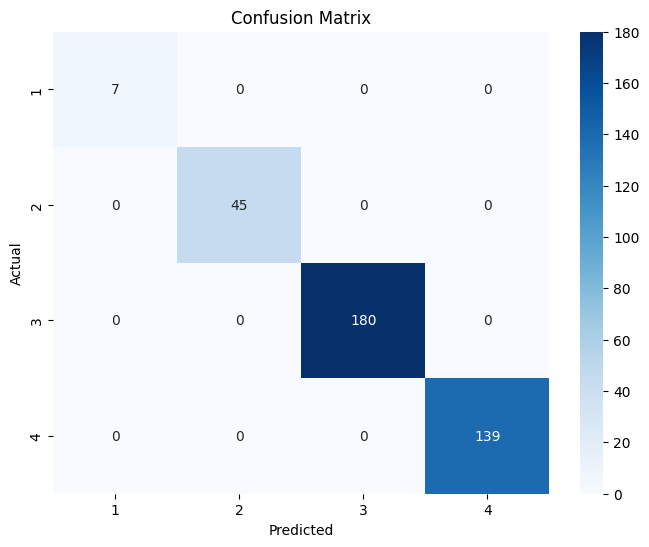

In [ ]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['1', '2', '3', '4']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
results = pd.DataFrame({'Actual Grade': y_test, 'Predicted Grade': y_pred})


print(results)

      Actual Grade  Predicted Grade
233              3                3
450              3                3
1240             3                3
1693             3                3
411              4                4
...            ...              ...
471              2                2
777              3                3
413              3                3
271              4                4
184              3                3

[371 rows x 2 columns]


## Random Forest

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
f1_rf = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:")
print(report)

Random Forest Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00       180
           4       1.00      1.00      1.00       139

    accuracy                           1.00       371
   macro avg       1.00      1.00      1.00       371
weighted avg       1.00      1.00      1.00       371



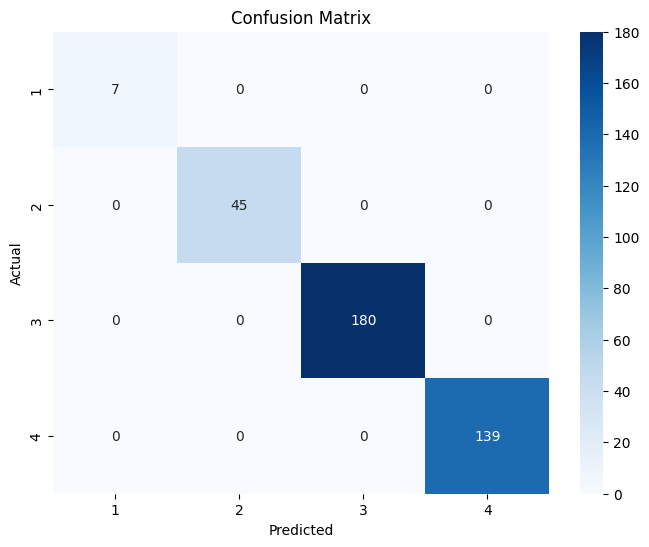

In [ ]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['1', '2', '3', '4']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Logistic Regression

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
f1_lr = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("Classification Report:")
print(report)

Random Forest Classifier Metrics:
Accuracy: 0.9892183288409704
Precision: 0.9894527129966014
Recall: 0.9892183288409704
F1 Score: 0.9891332852557826
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      0.93      0.97        45
           3       0.98      1.00      0.99       180
           4       1.00      0.99      1.00       139

    accuracy                           0.99       371
   macro avg       0.99      0.98      0.99       371
weighted avg       0.99      0.99      0.99       371



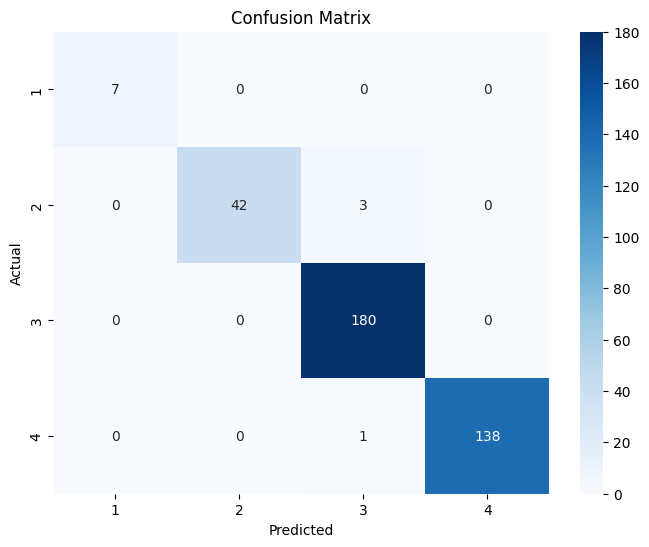

In [ ]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['1', '2', '3', '4']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine (SVM)

In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average='weighted')
recall_svm = recall_score(y_test, y_pred, average='weighted')
f1_svm = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)
print("Classification Report:")
print(report)

Random Forest Classifier Metrics:
Accuracy: 0.967654986522911
Precision: 0.9681288567791486
Recall: 0.967654986522911
F1 Score: 0.9671530328409258
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86         7
           2       0.97      0.84      0.90        45
           3       0.95      0.99      0.97       180
           4       0.99      0.99      0.99       139

    accuracy                           0.97       371
   macro avg       0.94      0.92      0.93       371
weighted avg       0.97      0.97      0.97       371



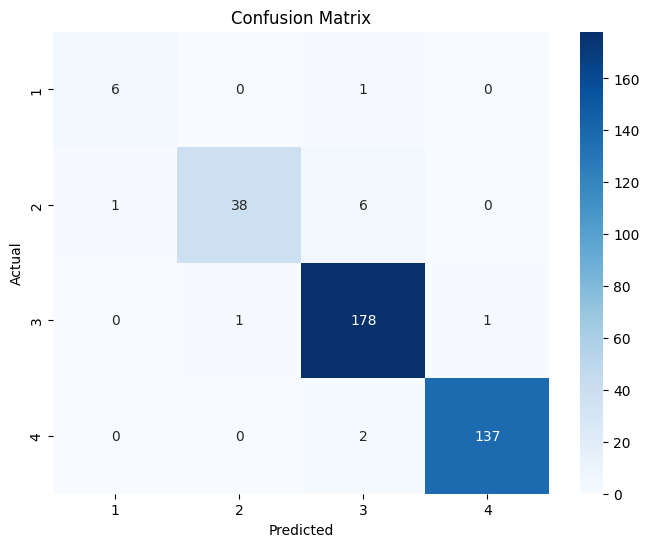

In [ ]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = ['1', '2', '3', '4']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion, index=class_labels, columns=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average='weighted')
recall_nb = recall_score(y_test, y_pred, average='weighted')
f1_nb = f1_score(y_test, y_pred, average='weighted')

# Generate classification report
report = classification_report(y_test, y_pred)
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:")
print(report)

Random Forest Classifier Metrics:
Accuracy: 0.8840970350404312
Precision: 0.8866709624092015
Recall: 0.8840970350404312
F1 Score: 0.8842066733500444
Classification Report:
              precision    recall  f1-score   support

           1       0.70      1.00      0.82         7
           2       0.89      0.87      0.88        45
           3       0.87      0.91      0.89       180
           4       0.91      0.85      0.88       139

    accuracy                           0.88       371
   macro avg       0.84      0.91      0.87       371
weighted avg       0.89      0.88      0.88       371



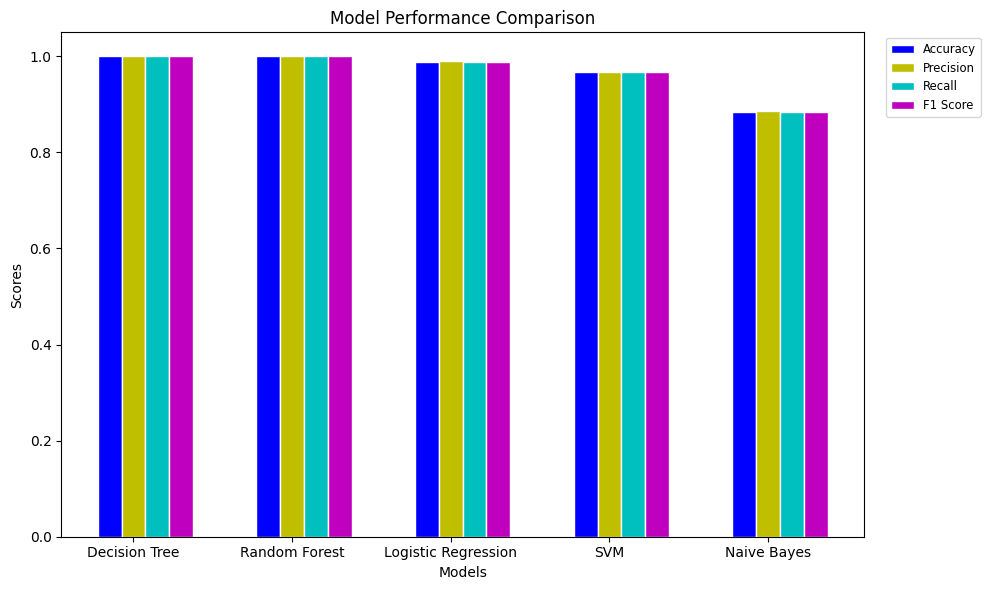

In [ ]:
# Evaluation metrics for each model
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes']
accuracy = [accuracy_dt, accuracy_rf, accuracy_lr, accuracy_svm, accuracy_nb]
precision = [precision_dt, precision_rf, precision_lr, precision_svm, precision_nb]
recall = [recall_dt, recall_rf, recall_lr, recall_svm, recall_nb]
f1 = [f1_dt, f1_rf, f1_lr, f1_svm, f1_nb]

# Set the width of each bar
bar_width = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='y', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='c', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1, color='m', width=bar_width, edgecolor='white', label='F1 Score')

# Add xticks and labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend(fontsize='small', bbox_to_anchor=(1.02, 1.0))

# Show plot
plt.tight_layout()
plt.show()